# Linear Regression 


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv('study_hours_scores.csv')
X = df[['Hours']].values
y = df['Scores'].values


## Closed-form Ordinary Least Squares

In [2]:

X_b = np.c_[np.ones((X.shape[0], 1)), X]
theta_ols = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
y_pred_ols = X_b @ theta_ols
mse_ols = np.mean((y - y_pred_ols) ** 2)
print("Closed-form OLS:")
print("Theta (bias, weight):", theta_ols)
print("MSE:", mse_ols)


Closed-form OLS:
Theta (bias, weight): [2.46184188 9.76419755]
MSE: 28.741252176095113


## Scikit-learn LinearRegression

In [3]:

model = LinearRegression()
model.fit(X, y)
y_pred_sklearn = model.predict(X)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)
print("Scikit-learn LinearRegression:")
print("  Intercept (bias):", model.intercept_)
print("  Coefficient (weight):", model.coef_[0])
print("  MSE:", mse_sklearn)


Scikit-learn LinearRegression:
  Intercept (bias): 2.461841878264167
  Coefficient (weight): 9.764197550226623
  MSE: 28.741252176095095


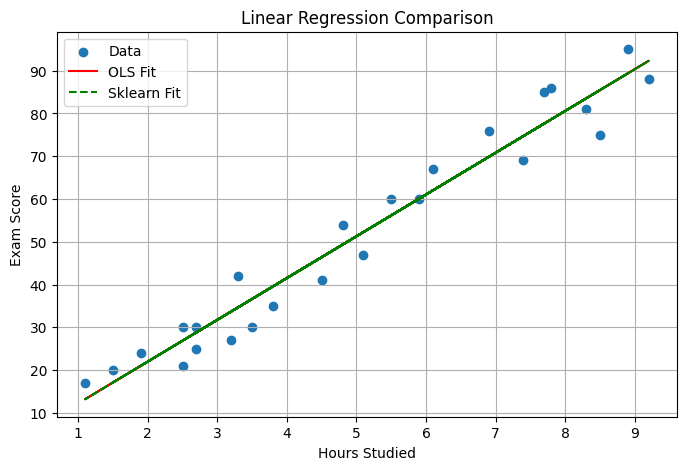

In [4]:

plt.figure(figsize=(8,5))
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred_ols, label='OLS Fit', color='red')

plt.plot(X, y_pred_sklearn, label='Sklearn Fit', color='green', linestyle='--')

plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Linear Regression Comparison')
plt.legend()
plt.grid(True)
plt.show()
